<a href="https://colab.research.google.com/github/Edgar121207/MSCI-151/blob/main/CW4_Muhammad_Edgar_Al_Farizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

df = pd.read_excel('/content/sample_data/MSCI151 Data (1).xlsx')

display(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')

In [36]:
from sklearn.linear_model import LassoCV
import pandas as pd

# Define the features (X) and target (y) for LASSO filtering
all_possible_features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
features_lasso = [f for f in all_possible_features if f in df.columns]
X_lasso = df[features_lasso]
y_lasso = df['Profitability'] # Assuming 'Profitability' is the target based on previous OLS analysis

# Initialize and fit LassoCV model
# LassoCV automatically performs cross-validation to find the best alpha
model_lasso = LassoCV(cv=5, random_state=0).fit(X_lasso, y_lasso)

# Features whose coefficients are non-zero are the selected ones
selected_features_lasso = X_lasso.columns[model_lasso.coef_ != 0]

print("Selected features by LASSO filtering:")
display(selected_features_lasso)

Selected features by LASSO filtering:


Index(['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience',
       'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
features = ['debt','CEO Gender']
target = 'Profitability'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (97, 2)
Testing set shape: (25, 2)


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 181.38
R-squared (R2): -2.94


In [27]:
display(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define all possible features for PCA (original list)
all_possible_pca_features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']

# Filter the features to only include those present in the DataFrame
features_pca = [f for f in all_possible_pca_features if f in df.columns]
X_pca = df[features_pca]

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Display the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
print(pca.explained_variance_ratio_.cumsum())

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_pca)

# Display the loading factors
print("\nLoading Factors:")
display(loading_factors)

Explained Variance Ratio:
[0.21646528 0.1646637  0.14662025 0.12690747 0.12010641 0.10233441
 0.07266299 0.05023949]

Cumulative Explained Variance Ratio:
[0.21646528 0.38112897 0.52774923 0.6546567  0.77476311 0.87709752
 0.94976051 1.        ]

Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
debt,-0.178940,-0.195028,-0.457139,-0.390113,0.676002,-0.070925,0.220154,-0.241460
RnD,0.251910,0.030562,-0.310697,0.721174,0.375636,0.214942,-0.344530,-0.113927
Firm Age,0.403467,0.318282,-0.287260,-0.280234,-0.147963,-0.557770,-0.442927,-0.213721
Firm Size,0.352085,0.262286,-0.030095,-0.443908,-0.004660,0.767812,-0.129231,-0.055001
CEO Experience,0.216687,0.682889,0.024593,0.126100,0.252045,-0.143954,0.550688,0.287571
foreign sales,-0.144921,0.159530,0.659537,-0.125337,0.537906,-0.102141,-0.446452,0.061281
CEO education,0.520061,-0.479991,-0.015456,-0.124721,0.153973,-0.102902,-0.027185,0.669564
CEO Gender,0.528540,-0.262212,0.418612,0.070487,0.058537,-0.079890,0.341511,-0.587578


In [37]:
print("""----------------------------------------""")
print("       ** Company Transaction **     ")
print("""----------------------------------------""")
print("Date: 2023-10-27\n")

# Select a few relevant columns and a sample of 5 rows
receipt_data = df[['id', 'Profitability', 'debt', 'foreign sales']].sample(5, random_state=42)

for index, row in receipt_data.iterrows():
    print(f"ID: {int(row['id']):<5} Profit: {row['Profitability']:>8.2f} Debt: {row['debt']:>8.2f} Foreign Sales: {row['foreign sales']:>8.2f}")

print("\n""----------------------------------------""")
print("        Thank You For Your Business!  ")
print("""----------------------------------------""")

SyntaxError: incomplete input (ipython-input-591660373.py, line 1)

/tmp/ipython-input-2832610714.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='Profitability', data=receipt_data, ax=axes[0], palette='viridis')
/tmp/ipython-input-2832610714.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='debt', data=receipt_data, ax=axes[1], palette='plasma')
/tmp/ipython-input-2832610714.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='foreign sales', data=receipt_data, ax=axes[2], palette='magma')


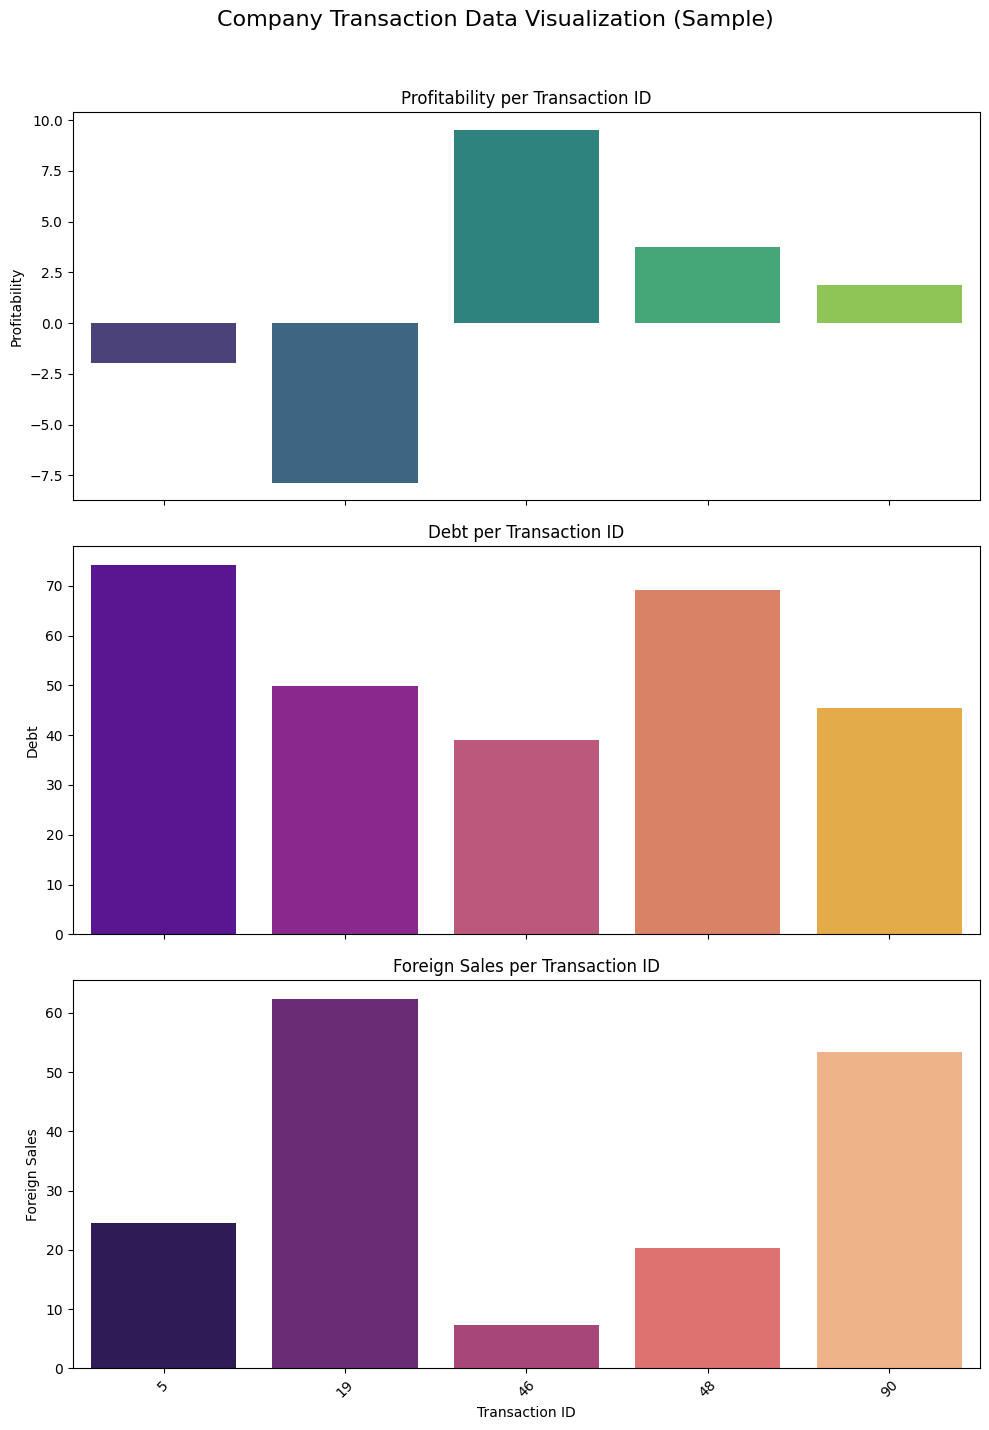

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure receipt_data is defined for visualization
# Select a few relevant columns and a sample of 5 rows
receipt_data = df[['id', 'Profitability', 'debt', 'foreign sales']].sample(5, random_state=42)

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Company Transaction Data Visualization (Sample)', fontsize=16)

# Plot Profitability
sns.barplot(x='id', y='Profitability', data=receipt_data, ax=axes[0], palette='viridis')
axes[0].set_title('Profitability per Transaction ID')
axes[0].set_ylabel('Profitability')

# Plot Debt
sns.barplot(x='id', y='debt', data=receipt_data, ax=axes[1], palette='plasma')
axes[1].set_title('Debt per Transaction ID')
axes[1].set_ylabel('Debt')

# Plot Foreign Sales
sns.barplot(x='id', y='foreign sales', data=receipt_data, ax=axes[2], palette='magma')
axes[2].set_title('Foreign Sales per Transaction ID')
axes[2].set_ylabel('Foreign Sales')

plt.xlabel('Transaction ID')
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

In [35]:
print("Re-evaluated features selected by LASSO filtering:")
display(selected_features_lasso)

Re-evaluated features selected by LASSO filtering:


Index(['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience',
       'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')

##High Inflation

##Good Economy

# Task
Train a Random Forest model using the LASSO-selected features from `selected_features_lasso` and 'Profitability' as the target, then split the data into training and testing sets (80/20 split), and finally evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2).

## Prepare Data for Random Forest

### Subtask:
Use the features selected by LASSO filtering (`selected_features_lasso`) and 'Profitability' as the target variable for the Random Forest model.


**Reasoning**:
To prepare the data for the Random Forest model, I will define the features (X) using the columns identified by LASSO filtering (`selected_features_lasso`) and the target (y) as 'Profitability' from the original DataFrame.



In [31]:
X = df[selected_features_lasso]
y = df['Profitability']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (122, 8)
Target (y) shape: (122,)


## Split Data

### Subtask:
Split the prepared data into training and testing sets (80% training, 20% testing) to evaluate the model's performance on unseen data.


**Reasoning**:
I need to import the `train_test_split` function to split the data into training and testing sets, as specified in the instructions.



In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (97, 8)
Testing set shape (X_test): (25, 8)
Training set shape (y_train): (97,)
Testing set shape (y_test): (25,)


## Train Random Forest Model

### Subtask:
Train a Random Forest Regressor model using the training data (`X_train`, `y_train`).

**Reasoning**:
To train the Random Forest Regressor, I will import the `RandomForestRegressor` class, initialize it with a `random_state` for reproducibility, and then fit the model using the `X_train` and `y_train` datasets.



In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Random Forest model training complete.")

Random Forest model training complete.


## Evaluate Random Forest Model

### Subtask:
Evaluate the trained Random Forest model's performance on the test set (`X_test`, `y_test`) using Mean Squared Error (MSE) and R-squared (R2).

**Reasoning**:
To evaluate the model's performance, I will make predictions on the test set and then calculate the Mean Squared Error (MSE) and R-squared (R2) using `sklearn.metrics`.



In [34]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 113.68
R-squared (R2): -1.47


## Final Task

### Subtask:
Summarize the performance of the Random Forest model.


## Summary:

### Q&A
The Random Forest model's performance on the test set is as follows:
*   Mean Squared Error (MSE): 113.68
*   R-squared (R2) score: -1.47

### Data Analysis Key Findings
*   Eight features were selected by LASSO for the Random Forest model, and 'Profitability' was used as the target variable for 122 data samples.
*   The data was split into training (97 samples) and testing (25 samples) sets, maintaining an 80/20 ratio.
*   A Random Forest Regressor model was trained with 100 estimators.
*   The model achieved a Mean Squared Error (MSE) of 113.68 on the test set.
*   The R-squared (R2) score for the model on the test set was -1.47, indicating that the model performs worse than simply predicting the mean of the target variable.

### Insights or Next Steps
*   The negative R-squared value (-1.47) is a critical finding, suggesting that the current Random Forest model, with the selected features, does not effectively explain the variance in 'Profitability' and performs worse than a simple baseline model.
*   Further investigation is required to improve model performance, including hyperparameter tuning for the Random Forest, re-evaluating the feature selection process, or exploring other regression models.
